In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import openweathermapy.core as owm
from random import randint
import numpy as np
from config import key1, key2, key3, key4, key5, key6, key7, key8
import csv
from citipy import citipy

In [2]:
# Randomly select 500 unique latitudes
latitude = []

for x in range(1000):
    latitude.append(np.random.uniform(low=-180.0, high=180, size=None))


lat_series = pd.Series(latitude)

In [3]:
longitude = []

for x in range(10000):
    longitude.append(np.random.uniform(low=-180.0, high=180, size=None))
    
long_series = pd.Series(longitude)

In [4]:
#getting the series together to then convert to DF and add appropriate columns
lat_long = pd.concat([lat_series, long_series], axis=1)

#renaming columns to fit lat and long
lat_long = lat_long.rename(columns={0: "Latitude", 1:"Longitude"})
lat_long.head()

,Latitude,Longitude
0,3.970149,149.310012
1,-27.216460,-93.702501
2,-90.645563,-17.319352
3,5.395946,-165.427805
4,-97.934665,-44.623767


In [5]:
# finding cites to match with lat and long, storing them in an empty list
cities = []



for index, row in lat_long.iterrows():
    x = row["Latitude"]
    y = row["Longitude"]
    city = citipy.nearest_city(x,y)
    lat_long.set_value(index, "City", city.city_name)
    lat_long.set_value(index, "Country Code", city.country_code)
    list_city = city.city_name
    cities.append(list_city)
    
    
cities = pd.Series(cities)

#making sure there are no duplicate rows from iterations
lat_long = lat_long.drop_duplicates(subset = ["City"], keep = "first")
lat_long = lat_long.reset_index(drop=True)
lat_long.head()

C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


,Latitude,Longitude,City,Country Code
0,3.970149,149.310012,lorengau,pg
1,-27.216460,-93.702501,pisco,pe
2,-90.645563,-17.319352,ushuaia,ar
3,5.395946,-165.427805,makakilo city,us
4,169.639658,26.643767,longyearbyen,sj


In [6]:
# Create empty list for storing city + country code together
city_code = []

# fidning list of cities to find their weather data
for index, row in lat_long.iterrows():
    x = row["City"]
    y = row["Country Code"]
    city = str(x) + "," + str(y)
    
    if city not in city_code:
        city_code.append(city) 
#city_code

In [7]:
#creating list/df to make arg/kwarg to get specified data
settings = {"units": "imperial", "appid": key8}
summary = ["name", "sys.country", "coord.lon", "coord.lat", "main.temp", "wind.speed", "clouds.all"]


weather_summary = []
# getting weather data
for city in city_code:
    print(f"Retrieving data for city:{city}.")
    try:
        current_weather = owm.get_current(city, **settings)
        weather_char = current_weather(*summary)
        weather_summary.append(weather_char)
        
        
    except: 
        print("No data found.")

Retrieving data for city:lorengau,pg.
Retrieving data for city:pisco,pe.
Retrieving data for city:ushuaia,ar.
Retrieving data for city:makakilo city,us.
Retrieving data for city:longyearbyen,sj.
Retrieving data for city:punta arenas,cl.
Retrieving data for city:bluff,nz.
Retrieving data for city:bredasdorp,za.
Retrieving data for city:albany,au.
Retrieving data for city:upernavik,gl.
Retrieving data for city:busselton,au.
Retrieving data for city:vaini,to.
Retrieving data for city:mar del plata,ar.
Retrieving data for city:yellowknife,ca.
Retrieving data for city:taolanaro,mg.
No data found.
Retrieving data for city:barrow,us.
Retrieving data for city:ust-kamchatsk,ru.
No data found.
Retrieving data for city:tuktoyaktuk,ca.
Retrieving data for city:barentsburg,sj.
No data found.
Retrieving data for city:vao,nc.
Retrieving data for city:east london,za.
Retrieving data for city:katsuura,jp.
Retrieving data for city:hami,cn.
Retrieving data for city:saint anthony,ca.
No data found.
Retrie

Retrieving data for city:axim,gh.
Retrieving data for city:motygino,ru.
Retrieving data for city:nouadhibou,mr.
Retrieving data for city:shirokiy,ru.
Retrieving data for city:portland,au.
Retrieving data for city:byron bay,au.
Retrieving data for city:bad nenndorf,de.
Retrieving data for city:palaia fokaia,gr.
Retrieving data for city:kodiak,us.
Retrieving data for city:arona,es.
Retrieving data for city:vaitupu,wf.
No data found.
Retrieving data for city:macaboboni,ph.
No data found.
Retrieving data for city:louisbourg,ca.
No data found.
Retrieving data for city:ranong,th.
Retrieving data for city:albanel,ca.
Retrieving data for city:luanda,ao.
Retrieving data for city:beloha,mg.
Retrieving data for city:atar,mr.
Retrieving data for city:yerbogachen,ru.
Retrieving data for city:clyde river,ca.
Retrieving data for city:middlebury,us.
Retrieving data for city:huarmey,pe.
Retrieving data for city:cockburn town,bs.
Retrieving data for city:nanakuli,us.
Retrieving data for city:college,us.

In [12]:
weather_sum_df = pd.DataFrame(list(weather_summary))
#weather_sum_df.head()
#rename columns
weather_sum_df = weather_sum_df.rename(columns ={0:"City", 1:"Country Code", 2:"Longitude",
                                                  3:"Latitude", 4:"Temperature", 5:"Wind Speed", 6:"Cloudiness"})
weather_sum_df.head()

#saving to csv
weather_sum_df.to_csv()

',City,Country Code,Longitude,Latitude,Temperature,Wind Speed,Cloudiness\n0,Lorengau,PG,147.27,-2.02,80.57,5.95,56\n1,Pisco,PE,-76.2,-13.71,71.6,10.29,0\n2,Ushuaia,AR,-68.31,-54.81,46.4,17.22,90\n3,Makakilo City,US,-158.09,21.35,66.63,5.82,40\n4,Longyearbyen,SJ,15.64,78.22,10.4,8.05,40\n5,Punta Arenas,CL,-70.91,-53.16,53.6,23.04,40\n6,Bluff,NZ,168.33,-46.6,58.88,27.09,64\n7,Bredasdorp,ZA,20.04,-34.53,71.6,11.41,24\n8,Albany,AU,117.88,-35.02,55.01,10.09,8\n9,Upernavik,GL,-56.15,72.79,-5.12,10.76,8\n10,Busselton,AU,115.35,-33.64,63.87,9.64,64\n11,Vaini,TO,-175.2,-21.2,80.39,16.02,12\n12,Mar del Plata,AR,-67.52,-46.43,64.64,19.15,24\n13,Yellowknife,CA,-114.38,62.45,-4.01,4.7,75\n14,Barrow,US,-90.4,39.51,46.9,13.87,90\n15,Tuktoyaktuk,CA,-133.03,69.44,-2.12,2.24,90\n16,Vao,NC,167.48,-22.67,80.3,23.06,92\n17,East London,ZA,27.91,-33.02,69.8,1.12,0\n18,Katsuura,JP,134.5,33.93,45.29,2.59,0\n19,Hami,CN,93.51,42.84,52.4,4.72,56\n20,Kapaa,US,-159.32,22.08,62.6,9.17,1\n21,Dikson,RU,80.55,73.51,-10

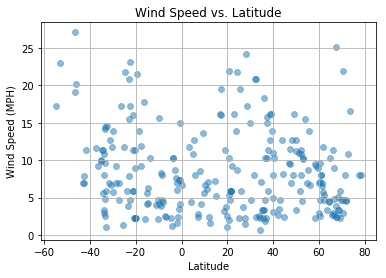

In [13]:
# Wind Speed vs Latitude graph

plt.scatter(weather_sum_df["Latitude"],
            weather_sum_df["Wind Speed"],
            linewidths=.75, marker="o",
            alpha=0.5)

# Labels
plt.title("Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("wind_vs_lat.png")

plt.show()

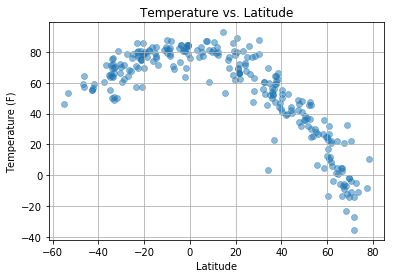

In [10]:
# Temperature vs Latitude graph

plt.scatter(weather_sum_df["Latitude"],
            weather_sum_df["Temperature"],
            linewidths=.75, marker="o",
            alpha=0.5)

# Labels
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("temp_vs_lat.png")

plt.show()

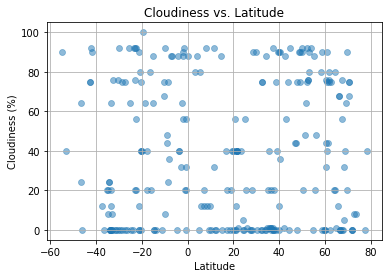

In [11]:
# Cloudiness vs Latitude graph

plt.scatter(weather_sum_df["Latitude"],
            weather_sum_df["Cloudiness"],
            linewidths=.75, marker="o",
            alpha=0.5)

# Labels
plt.title("Cloudiness vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("clouds_vs_lat.png")

plt.show()